In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import geopandas
pd.set_option('display.max_rows', 500)

In [5]:
# for second linear regression
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
taxiDB = pd.read_csv('C:\\Users\\Danny\\Desktop\\GITHUB\\NYC_TAXI_DATA\\train.csv')
taxiDB.pickup_datetime=pd.to_datetime(taxiDB.pickup_datetime)
taxiDB.dropoff_datetime=pd.to_datetime(taxiDB.dropoff_datetime)
taxiDB['pu_hour'] = taxiDB.pickup_datetime.dt.hour
taxiDB['yday'] = taxiDB.pickup_datetime.dt.dayofyear
taxiDB['wday'] = taxiDB.pickup_datetime.dt.dayofweek
taxiDB['month']= taxiDB.pickup_datetime.dt.month

In [4]:
taxiDB

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pu_hour,yday,wday,month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,74,0,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,164,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,19,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,97,2,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,86,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,13,99,4,4
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,7,10,6,1
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6,113,4,4
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,15,5,1,1


In [ ]:
# splitting data by vendor_id 

In [ ]:
vendor_1 = taxiDB.loc[taxiDB['vendor_id'] == 1 ]
vendor_1 

In [ ]:
vendor_1.to_csv(r'C:\\Users\\Danny\\Desktop\\GITHUB\\new folder\\taxi_vendor1.csv', index = False)

In [ ]:
vendor_2 = taxiDB.loc[taxiDB['vendor_id'] == 2 ]
vendor_2 

In [ ]:
vendor_2.to_csv(r'C:\\Users\\Danny\\Desktop\\GITHUB\\new folder\\taxi_vendor2.csv', index = False)

In [4]:
# building a linear regression model
from sklearn.linear_model import LinearRegression

In [ ]:
# predicting responses ! 
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

In [5]:
# providing the data
passenger_column = taxiDB.loc[:,'passenger_count']
x_x = passenger_column.values
x = x_x.reshape((-1,1))
print(x)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [6]:
tripd_column= taxiDB.loc[:,'trip_duration']
y = tripd_column.values
print(y)

[ 455  663 2124 ...  764  373  198]


In [7]:
# creating our model
model = LinearRegression()

In [8]:
model = LinearRegression().fit(x, y)

In [9]:
# getting our results
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 7.175763583744388e-05


In [10]:
print('intercept:', model.intercept_)

intercept: 903.3010427865897


In [11]:
print('slope:', model.coef_)

slope: [33.75802558]


In [13]:
# now let us visualize our linear regression using a scatter plot

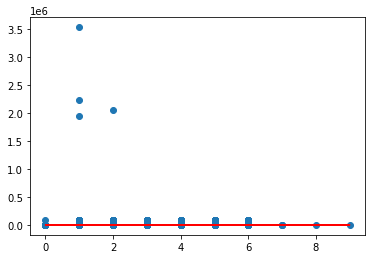

In [14]:
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')
plt.show()

In [ ]:
# lets try again o_O

In [6]:
from sklearn.model_selection import train_test_split
#version 3
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)


In [7]:
train, test = statsmodels_train_test_split(taxiDB)

In [9]:
formula = 'trip_duration ~ passenger_count + pu_hour + C(wday) + C(month)'
lm = smf.ols(formula=formula, data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     12.35
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           1.55e-27
Time:                        18:49:02   Log-Likelihood:            -1.1027e+07
No. Observations:             1093983   AIC:                         2.205e+07
Df Residuals:                 1093969   BIC:                         2.205e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         776.6557     24.461     31.751      0.000     728.714     824.597
C(wday)[T.1]       87.7979     21.364      4.110      0.000      45.925     129.671
C(wday)[T.2]       65.9937     21.196      3.113      0.002      24.450     107.537
C(wday)[T.3]       95.0870     21.011      4.526      0.000      53.907     136.267
C(wday)[T.4]       84.6173     20.902      4.048      0.000      43.649     125.585
C(wday)[T.5]       60.1639     20.973      2.869      0.004      19.058     101.270
C(wday)[T.6]        4.1369     21.622      0.191      0.848     -38.242      46.516
C(month)[T.2]       2.4992     19.512      0.128      0.898     -35.744      40.743
C(month)[T.3]       7.9893     19.179      0.417      0.677     -29.602      45.580
C(month)[T.4]      29.3488     19.248      1.525      0.127      -8.377      67.074
C(month)[T.5]      77.0252     19.319      3.987      0.000      39.160     114.890
C(month)[T.6]      91.0019     19.600      4.643      0.000      52.586     129.418
passenger_count    34.1556      4.200      8.132      0.000      25.923      42.388
pu_hour             2.6263      0.867      3.028      0.002       0.927       4.326
================================================================================
Omnibus:                  6199978.878   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   1373381094289936.000
Skew:                         340.390   Prob(JB):                           0.00
Kurtosis:                  173580.139   Cond. No.                           122.
================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
y_test_pred = lm.predict(test)
y_test_pred

811560      918.708176
949563      974.292791
555610      908.780116
480331     1017.706877
1122947     950.691530
              ...     
168059     1019.302691
1206771     945.292990
860910     1058.520665
598534     1008.405653
1175489    1013.671790
Length: 364661, dtype: float64

In [ ]:
# this model does not fit our data

In [ ]:
#taxiDB.to_csv(r'C:\\Users\\Danny\\Desktop\\GITHUB\\new folder\\taxi.csv', index = False)
# for Tableau visuals. 

In [ ]:
# geopandas 
# converting the dataframe into geodataframe

In [ ]:
gdf = geopandas.GeoDataFrame(
    taxiDB, geometry=geopandas.points_from_xy(taxiDB.pickup_longitude, taxiDB.pickup_latitude))
print(gdf.head())

In [ ]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [ ]:
gdf = gdf.to_crs(epsg=3857)

In [ ]:
import contextily as ctx

In [ ]:
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

In [ ]:
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=12)

In [ ]:
# importing NYC map data 

In [ ]:
boros = geopandas.read_file(geopandas.datasets.get_path("nybb"))
boro_locations = geopandas.tools.geocode(boros.BoroName)

In [ ]:
fig, ax = plt.subplots()

In [ ]:
boros.to_crs("EPSG:4326").plot(ax=ax, color="white", edgecolor="black");

In [ ]:
boro_locations.plot(ax=ax, color="red");